In [5]:
import sys
print(f'Python version:', sys.version)

Python version: 3.6.8 (tags/v3.6.8:3c6b436a57, Dec 24 2018, 00:16:47) [MSC v.1916 64 bit (AMD64)]


# Tasks

1. Да се реализираат примери за парсирање на FASTA и GenBank формати, онака како што е објаснето во поглавје 2.4 од туторијалот.

2. Да се напишат 3 примери за поврзување со различни биолошки бази, како што е опишано во поглавје 2.5 од туторијалот.

3. Да се напише пример за работа со Seq објекти, какошто е опишано во поглавје 3, и да се обрне внимание на процесите транскрипција и транслација.

4. Да се преземе комплетната ДНА секвенција на Yersinia pestis (бактерија која ги инфектира белите дробови и предизвикува пневмонија). До неа се пристапува со употреба на идентификациониот број NC_005816 во GeneBank базата (работете со `SeqIO` објекти, имате детали во документацијата.

5. Имплеметирајте репликација на секвенцијата потпомогната од функции во biopython.

6. Со помош на biopython, пронајдете ги секвенциите на различните кодни региони означени како (CDS). CDS се регионите добиени после процедурата на отсекување на интроните.

7. Одберете еден CDS и најдете ги сите старт и стоп кодони во неговата РНА.

8. Направете транслација за да ги добиете сите можни протеински секвенции.

9. Одберете еден од кодните региони и направете мутација со поместување на рамката за 2 нуклеотиди. Анализирајте ги новите протеински секвенции. Внимавајте, сега има нови старт и стоп кодони.

10. Да се разработи поглавје 5.5 за креирање на сопствени записи во `FASTA` формат.

11. Да реализира примерот за предвидување на структурата на оперонот кај бактеријата Bacillus subtilis опишан во поглавје 16 од туторијалот. Да се употреби методот на Логистичка регресија и Машини со Поддржувачки Вектори (SVM) и да се споредат резултатите.

12. Да се испрограмира алгоритмот на Nussinovкако функција во python која на влез ќе добива стринг од нуклеотиди, а на излезе ќе ја дава нивната секундарна структура.Влез нека биде следната tRNA молекула:
`ACCGCGGGGCGUCCGGCUCAGCUUGCCGCUGCGGAGCGCCGCAGUAGCCGAAACUUCCGGCUCGGGCCGUGGGCGGUCUCUAGUCGCCCCG`

13. Да се истражи можноста на biopythonза одредување на секундарна структураопишана во поглавје 11.6.8. 

# Imports

Today: 10-April-2020 <br> 

Coronavirus Genome Sequence <br>
FASTA Nucleotide - Coronavirus <br>
Author: Aspie Girl <br>
 •  updated 7 days ago (Version 3)<br>
https://www.kaggle.com/usharengaraju/customer-frauddata <br>

Coronavirus Genome Sequence <br>
2019-nCoV / SARS-CoV-2 <br>
Author: Paul Mooney <br>
 •  updated a month ago (Version 2) <br>
https://www.kaggle.com/paultimothymooney/coronavirus-genome-sequence/data

In [33]:
%pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [138]:
import os 
import sys

# Packages
import numpy as np
import pandas as pd
import termcolor as tc
import Bio; print('BioPython version:', Bio.__version__)

# Local Imports
import definitions as defs

BioPython version: 1.76


# Solutions

## Task 1. Да се реализираат примери за парсирање на FASTA и GenBank формати, онака како што е објаснето во поглавје 2.4 од туторијалот.

### `FASTA`

In [10]:
from Bio import SeqIO

fasta_file = os.path.join(defs.DATA_DIR, 'coronavirus.fasta')

for seq_record in SeqIO.parse(fasta_file, 'fasta'):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

lcl|NC_034972.1_cds_YP_009380519.1_1
Seq('ATGGCTAACCAATATGTCCTGCGTGTAGCAGACTGCACAAACGTTTACTACACT...TAG', SingleLetterAlphabet())
11925
lcl|NC_034972.1_cds_YP_009380520.1_2
Seq('GAGCCCTGTAGTGAGCATCATGTGATAAGGGCTTTTGATATTTACAATAAGGAT...TGA', SingleLetterAlphabet())
8016
lcl|NC_034972.1_cds_YP_009380521.1_3
Seq('ATGGCTCTCATTTTTGTGCTTATGCTCATAACCCTCTATCGTTGCCCTTTTGTC...TGA', SingleLetterAlphabet())
3381
lcl|NC_034972.1_cds_YP_009380522.1_4
Seq('ATGATAGGTGGTCTTTTTTCAGTAGGGTTTGAACAGTTTATACAACATGCTAAT...TAA', SingleLetterAlphabet())
645
lcl|NC_034972.1_cds_YP_009380523.1_5
Seq('ATGTTACCCTCGTTTTTAAGAGTTTTTAATGATGAGGGTGTTGTTCTTAGCGTT...TGA', SingleLetterAlphabet())
237
lcl|NC_034972.1_cds_YP_009380524.1_6
Seq('ATGGTACTCTTTTGTGAGTTTAATGACACTGCCACCAATGGCTGTGAAGCCTGT...TAA', SingleLetterAlphabet())
747
lcl|NC_034972.1_cds_YP_009380525.1_7
Seq('ATGATTTTGGTTTTCCTTGTCCTTATAGCATCAGTTGGTGCTATTACTGATTCT...TAA', SingleLetterAlphabet())
501
lcl|NC_034972.1_cds_YP_009380526.1_8
Seq('ATGAGTTCCAACGTCTCCTGGGC

Notice that the FASTA format does not specify the alphabet, so `Bio.SeqIO` has defaulted to the rather
generic SingleLetterAlphabet() rather than something DNA specific.

### `GenBank`

In [11]:
from Bio import SeqIO

genbank_file = os.path.join(defs.DATA_DIR, 'ls_orchid.gbk')

for seq_record in SeqIO.parse(genbank_file, 'genbank'):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

Z78533.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC', IUPACAmbiguousDNA())
740
Z78532.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC', IUPACAmbiguousDNA())
753
Z78531.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA', IUPACAmbiguousDNA())
748
Z78530.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT', IUPACAmbiguousDNA())
744
Z78529.1
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA', IUPACAmbiguousDNA())
733
Z78527.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC', IUPACAmbiguousDNA())
718
Z78526.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT', IUPACAmbiguousDNA())
730
Z78525.1
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA', IUPACAmbiguousDNA())
704
Z78524.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC', IUPACAmbiguousDNA())
740
Z78523.1
Seq('CGTAACCAGGTTTCCGTAGGTGAACCTGCGGCAGGATCATTGTTGAGACAGCAG...AAG', IUPAC

This time `Bio.SeqIO` has been able to choose a sensible alphabet, IUPAC Ambiguous DNA. You'll also
notice that a shorter string has been used as the seq_record.id in this case.

## Task 2. Да се напишат 3 примери за поврзување со различни биолошки бази, како што е опишано во поглавје 2.5 од туторијалот.

### 9.2 EInfo: Obtaining information about the Entrez databases

In [13]:
from Bio import Entrez

Entrez.email = 'filip.markoski45@gmail.com'
handle = Entrez.einfo()
result = handle.read()
print(result)

<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE eInfoResult PUBLIC "-//NLM//DTD einfo 20190110//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20190110/einfo.dtd">
<eInfoResult>
<DbList>

	<DbName>pubmed</DbName>
	<DbName>protein</DbName>
	<DbName>nuccore</DbName>
	<DbName>ipg</DbName>
	<DbName>nucleotide</DbName>
	<DbName>structure</DbName>
	<DbName>sparcle</DbName>
	<DbName>genome</DbName>
	<DbName>annotinfo</DbName>
	<DbName>assembly</DbName>
	<DbName>bioproject</DbName>
	<DbName>biosample</DbName>
	<DbName>blastdbinfo</DbName>
	<DbName>books</DbName>
	<DbName>cdd</DbName>
	<DbName>clinvar</DbName>
	<DbName>gap</DbName>
	<DbName>gapplus</DbName>
	<DbName>grasp</DbName>
	<DbName>dbvar</DbName>
	<DbName>gene</DbName>
	<DbName>gds</DbName>
	<DbName>geoprofiles</DbName>
	<DbName>homologene</DbName>
	<DbName>medgen</DbName>
	<DbName>mesh</DbName>
	<DbName>ncbisearch</DbName>
	<DbName>nlmcatalog</DbName>
	<DbName>omim</DbName>
	<DbName>orgtrack</DbName>
	<DbName>pmc</DbName>
	<DbName>p

In [14]:
handle = Entrez.einfo()
record = Entrez.read(handle)
record.keys()

dict_keys(['DbList'])

In [15]:
record['DbList']

['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'sparcle', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'homologene', 'medgen', 'mesh', 'ncbisearch', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'probe', 'proteinclusters', 'pcassay', 'biosystems', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']

In [16]:
handle = Entrez.einfo(db="pubmed")
record = Entrez.read(handle)

print(record["DbInfo"]["Description"])
print(record["DbInfo"]["Count"])
print(record["DbInfo"]["LastUpdate"])

PubMed bibliographic record
30863721
2020/04/10 07:39


In [17]:
for field in record["DbInfo"]["FieldList"]:
    print("%(Name)s, %(FullName)s, %(Description)s" % field)

ALL, All Fields, All terms from all searchable fields
UID, UID, Unique number assigned to publication
FILT, Filter, Limits the records
TITL, Title, Words in title of publication
WORD, Text Word, Free text associated with publication
MESH, MeSH Terms, Medical Subject Headings assigned to publication
MAJR, MeSH Major Topic, MeSH terms of major importance to publication
AUTH, Author, Author(s) of publication
JOUR, Journal, Journal abbreviation of publication
AFFL, Affiliation, Author's institutional affiliation and address
ECNO, EC/RN Number, EC number for enzyme or CAS registry number
SUBS, Supplementary Concept, CAS chemical name or MEDLINE Substance Name
PDAT, Date - Publication, Date of publication
EDAT, Date - Entrez, Date publication first accessible through Entrez
VOL, Volume, Volume number of publication
PAGE, Pagination, Page number(s) of publication
PTYP, Publication Type, Type of publication (e.g., review)
LANG, Language, Language of publication
ISS, Issue, Issue number of publ

### 9.3 ESearch: Searching the Entrez databases

In [19]:
from Bio import Entrez

Entrez.email = 'filip.markoski45@gmail.com'
handle = Entrez.esearch(db="pubmed", term="biopython")
record = Entrez.read(handle)
print(record)

{'Count': '28', 'RetMax': '20', 'RetStart': '0', 'IdList': ['32044951', '31762715', '31278684', '31069053', '30013827', '29641230', '28011774', '24929426', '24497503', '24267035', '24194598', '23842806', '23157543', '22909249', '22399473', '21666252', '21210977', '20015970', '19811691', '19773334'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'biopython[All Fields]', 'Field': 'All Fields', 'Count': '28', 'Explode': 'N'}, 'GROUP'], 'QueryTranslation': 'biopython[All Fields]'}


In [20]:
handle = Entrez.esearch(db="nucleotide", term="Cypripedioideae[Orgn] AND matK[Gene]", idtype="acc")
record = Entrez.read(handle)
print(record["Count"])
print(record["IdList"])

539
['MN016934.1', 'NC_045279.1', 'NC_045278.1', 'NC_045400.1', 'MN602053.1', 'MN535015.1', 'MN535014.1', 'KX886268.1', 'KX886267.1', 'KX886266.1', 'KX886265.1', 'KX886264.1', 'KX886263.1', 'KX886262.1', 'KX886261.1', 'KX886260.1', 'KX886259.1', 'KX886258.1', 'KX886257.1', 'KX886256.1']


In [21]:
handle = Entrez.esearch(db="nlmcatalog", term="computational[Journal]", retmax="20")
record = Entrez.read(handle)
print("{} computational journals found".format(record["Count"]))
print("The first 20 are\n{}".format(record["IdList"]))

172 computational journals found
The first 20 are
['101765300', '101759185', '101752828', '101755127', '101753951', '101753371', '101740904', '101737789', '101736625', '101728813', '101723217', '101754869', '101723351', '101719151', '101718871', '101717513', '101708081', '101707097', '101724357', '101721723']


In [36]:
# EPost
id_list = ["19304878", "18606172", "16403221", "16377612", "14871861", "14630660"]
result = Entrez.epost('pubmed', id=','.join(id_list)).read()
print(tc.colored(result, 'red'))
# ESummary
result = Entrez.esummary(db='nlmcatalog', id='101660833').read()
print(tc.colored(result, 'green'))
# EFetch
result = Entrez.efetch(db='nucleotide', id='EU490707', rettype='gb', retmode='text').read()
print(tc.colored(result, 'blue'))

<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE ePostResult PUBLIC "-//NLM//DTD epost 20090526//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20090526/epost.dtd"><ePostResult>
	<QueryKey>1</QueryKey>
	<WebEnv>NCID_1_161128255_130.14.18.48_9001_1586544646_602676031_0MetA0_S_MegaStore</WebEnv>
</ePostResult>

<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE eSummaryResult PUBLIC "-//NLM//DTD esummary v1 20041029//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20041029/esummary-v1.dtd">
<eSummaryResult>
<DocSum>
	<Id>101660833</Id>
	<Item Name="Host" Type="String"></Item>
	<Item Name="NLMUniqueID" Type="String">101660833</Item>
	<Item Name="AuthorList" Type="List">
		<Item Name="AuthorInfo" Type="Structure">
			<Item Name="CollectiveName" Type="String">Institute of Electrical and Electronics Engineers.</Item>
			<Item Name="LastName" Type="String"></Item>
			<Item Name="ForeName" Type="String"></Item>
			<Item Name="NameQualifier" Type="String"></Item>
			<Item Name="OtherInformatio

### 9.8 EGQuery: Global Query - counts for search terms

In [39]:
handle = Entrez.egquery(term="sars-cov-2")
record = Entrez.read(handle)
for row in record["eGQueryResult"]:
    print(row["DbName"], row["Count"])

pubmed 1380
pmc 971
mesh 6
books 7
pubmedhealth 0
omim 2
ncbisearch 9
nuccore 552
nucgss Error
nucest Error
protein 5615
genome 1
structure 106
taxonomy 1
snp 0
dbvar 0
gene 24
sra 891
biosystems 0
unigene Error
cdd 0
clone Error
popset 24
geoprofiles 0
gds 18
homologene 0
pccompound 0
pcsubstance 187
pcassay 38
nlmcatalog 0
probe 1
gap 1
proteinclusters 0
bioproject 41
biosample 874
biocollections 1


### 9.9 ESpell: Obtaining spelling suggestions

In [47]:
handle = Entrez.espell(term='virrusss')
record = Entrez.read(handle)
record

{'Database': 'pubmed', 'Query': 'virrusss', 'CorrectedQuery': 'viruses', 'SpelledQuery': ['', 'viruses']}

### 10.1.1 Parsing Swiss-Prot records

In [48]:
from urllib.request import urlopen # Python 3 only
from io import TextIOWrapper

opener = urlopen("https://raw.githubusercontent.com/biopython/biopython/master/Tests/SwissProt/F2CXE6.txt")
handle = TextIOWrapper(opener)

from Bio import SwissProt
record = SwissProt.read(handle)
print(record.description)

SubName: Full=Plasma membrane intrinsic protein {ECO:0000313|EMBL:BAN04711.1}; SubName: Full=Predicted protein {ECO:0000313|EMBL:BAJ87517.1};


### 10.5 Accessing the ExPASy server

In [49]:
for ref in record.references:
    print("authors:", ref.authors)
    print("title:", ref.title)
    print(record.organism_classification)

authors: Matsumoto T., Tanaka T., Sakai H., Amano N., Kanamori H., Kurita K., Kikuta A., Kamiya K., Yamamoto M., Ikawa H., Fujii N., Hori K., Itoh T., Sato K.
title: Comprehensive sequence analysis of 24,783 barley full-length cDNAs derived from 12 clone libraries.
['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Poales', 'Poaceae', 'BEP clade', 'Pooideae', 'Triticeae', 'Hordeum']
authors: Shibasaka M., Sasano S., Utsugi S., Katsuhara M.
title: Functional characterization of a novel plasma membrane intrinsic protein2 in barley.
['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Poales', 'Poaceae', 'BEP clade', 'Pooideae', 'Triticeae', 'Hordeum']
authors: Shibasaka M., Katsuhara M., Sasano S.
title: 
['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Poales', '

In [55]:
from Bio import ExPASy
from Bio import SwissProt
accessions = ["O23729", "O23730", "O23731"]
records = []

for accession in accessions:
    handle = ExPASy.get_sprot_raw(accession)
    try:
        record = SwissProt.read(handle)
    except:
        print("WARNING: Accession %s not found" % accession)

    records.append(record)

In [67]:
from Bio import SCOP

'''
def search(
    pdb=None,
    key=None,
    sid=None,
    disp=None,
    dir=None,
    loc=None,
    cgi="http://scop.mrc-lmb.cam.ac.uk/scop/search.cgi",
    **keywds
):
'''

# 2000668HIV-1 VPU cytoplasmic domain
scop_id = '2000668'

cgi = 'http://scop.mrc-lmb.cam.ac.uk/search?t=txt'
handle = SCOP.search(key=scop_id, cgi=cgi)

print(tc.colored('biopython does not have this feature well supported', attrs=['bold']))

biopython does not have this feature well supported


## Task 3. Да се напише пример за работа со `Seq` објекти, како што е опишано во поглавје 3, и да се обрне внимание на процесите транскрипција и транслација.

In [85]:
sars_cov_2_file = os.path.join(defs.DATA_DIR, 'MN908947.fna')
sars_cov_2_record = list(SeqIO.parse(sars_cov_2_file, 'fasta'))[0]

Let's just work with the first one.

In [87]:
type(sars_cov_2_record)

Bio.SeqRecord.SeqRecord

In [88]:
sars_cov_2_record.seq

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())

In [99]:
sars_cov_2_record.seq.alphabet

SingleLetterAlphabet()

source: https://dmnfarrell.github.io/bioinformatics/genomics-sarscov2-python <br>
The genome of the newly emerging CoV consists of a single, <b>positive-stranded RNA</b> that is approximately 30k nucleotides long. The overall genome organization of the newly emerging CoV is similar to that of other coronaviruses.

In [124]:
for letter in ['U', 'C', 'A', 'G', 'T']:
    print(letter, sars_cov_2_record.seq.count(letter))

U 0
C 5492
A 8954
G 5863
T 9594


source: https://en.wikipedia.org/wiki/Virus <br>
When not inside an infected cell or in the process of infecting a cell, viruses exist in the form of independent particles, or virions, consisting of: (i) the genetic material, i.e. <b>long molecules of DNA or RNA</b> that encode the structure of the proteins by which the virus acts; (ii) a protein coat, the capsid, which surrounds and protects the genetic material; and in some cases (iii) an outside envelope of lipids. 



Since input sequence is FASTA (DNA), and Coronavirus is RNA type of virus, we need to:

    Transcribe DNA to RNA (ATTAAAGGTT... => AUUAAAGGUU...)
    Translate RNA to Amino acid sequence (AUUAAAGGUU... => IKGLYLPR*Q...)

In the current scenario, the .fna file starts with ATTAAAGGTT, then we call transcribe() so T (thymine) is replaced with U (uracil), so we get the RNA sequence which starts with AUUAAAGGUU.

When we translate() the RNA sequence to amino-acid sequence, we get something like IKGLYLPR*Q ( is so called STOP codon, effectively is separator for proteins). In our scenario, sequence looks like this: IKGLYLPR*QTNQLSISCRSVL*TNFKICV, where:

    IKGLYLPR encodes first protein (every letter encodes single amino-acid)
    QTNQLSISCRSVL encodes second protein, and so on



In [126]:
from Bio.Alphabet import IUPAC

b = 3 * 15 # bounding index, a multiple of 3 because codons are triplets.

# So, I guess it's better to treat it with a DNA alphabet...
dna_corona = Seq(str(sars_cov_2_record.seq), IUPAC.ambiguous_dna);
print('dna_corona:', dna_corona[:b])
messenger_rna = dna_corona.transcribe()
print('messenger_rna:', messenger_rna[:b])

dna_corona: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCG
messenger_rna: AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCG


In [127]:
print('Total nucleotides:', len(messenger_rna))

Total nucleotides: 29903


In [129]:
from Bio.SeqUtils import GC

print('GC:', GC(messenger_rna))

GC: 37.97277865097148


In [130]:
len(messenger_rna) % 3 == 0

False

In [136]:
# Obtain Amino Acid Sequence from mRNA (translation)
amino_acids = messenger_rna.translate(table=1, cds=False) 

print('Amino Acids:', amino_acids[:b])
print('Total Amino acids:', len(amino_acids))

Amino Acids: IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*L
Total Amino acids: 9967


In [143]:
#Identify all the Proteins (chains of amino acids)
Proteins = amino_acids.split('*') # * is translated stop codon
df = pd.DataFrame(Proteins)
df.describe()
print('Total proteins:', len(df))

df['length'] = df[0].apply(lambda x: len(x))
df.rename(columns={0: "sequence"}, inplace=True)
df.tail()

Total proteins: 775


D:\code\py\corona-virus-analysis\.env\lib\site-packages\Bio\Seq.py:182: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  BiopythonWarning,


,sequence,length
770,"(S, H, I, A, I, F, N, Q, C, V, T, L, G, R, T)",15
771,"(K, S, H, H, I, F, T, E, A, T, R, S, T, I, E, ...",43
772,(F),1
773,(),0
774,"(L, L, R, R, M, T, K, K, K, K, K, K, K, K, K, K)",16


## Task 4. Да се преземе комплетната ДНА секвенција на Yersinia pestis (бактерија која ги инфектира белите дробови и предизвикува пневмонија). До неа се пристапува со употреба на идентификациониот број NC_005816 во GeneBank базата (работете со `SeqIO` објекти, имате детали во документацијат

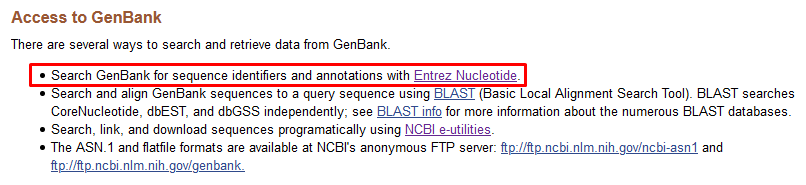

In [146]:
handle = Entrez.einfo()
record = Entrez.read(handle)
record['DbList']

['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'sparcle', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'homologene', 'medgen', 'mesh', 'ncbisearch', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'probe', 'proteinclusters', 'pcassay', 'biosystems', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']

In [194]:
handle = Entrez.efetch(db='nuccore', id='NC_005816', rettype='gb', retmode='text')
yersinia = SeqIO.read(handle, 'genbank')
handle.close()
print(yersinia.id)
print(yersinia.description)

NC_005816.1
Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence


In [195]:
yersinia.seq 

UnknownSeq(9609, alphabet=IUPACAmbiguousDNA(), character='N')

Since Entrez doesn't provide the correct sequence, the one used here is found here: <br>
https://raw.githubusercontent.com/biopython/biopython/master/Tests/GenBank/NC_005816.gb

In [204]:
yersinia_file = os.path.join(defs.DATA_DIR, 'NC_005816.gb')

for seq_record in SeqIO.parse(yersinia_file, 'genbank'):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

NC_005816.1
Seq('TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATCCAGG...CTG', IUPACAmbiguousDNA())
9609


In [205]:
yersinia = list(SeqIO.parse(yersenia_file, 'genbank'))[0]
print(yersinia)

ID: NC_005816.1
Name: NC_005816
Description: Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence
Database cross-references: Project:58037
Number of features: 41
/molecule_type=DNA
/topology=circular
/data_file_division=BCT
/date=21-JUL-2008
/accessions=['NC_005816']
/sequence_version=1
/gi=45478711
/keywords=['']
/source=Yersinia pestis biovar Microtus str. 91001
/organism=Yersinia pestis biovar Microtus str. 91001
/taxonomy=['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Enterobacteriales', 'Enterobacteriaceae', 'Yersinia']
/references=[Reference(title='Genetics of metabolic variations between Yersinia pestis biovars and the proposal of a new biovar, microtus', ...), Reference(title='Complete genome sequence of Yersinia pestis strain 91001, an isolate avirulent to humans', ...), Reference(title='Direct Submission', ...), Reference(title='Direct Submission', ...)]
/comment=PROVISIONAL REFSEQ: This record has not yet been subject to final
NCBI review. The 

## Task 5. Имплеметирајте репликација на секвенцијата потпомогната од функции во biopython.


| ![image.png](docs/images/leading_strand.png)	|   ![image.png](docs/images/lagging_strand.png) 	|
|---	|---	|
|  ![image.png](docs/images/dna_ligase.png) 	|   ![image.png](docs/images/transcription.png)	|

> The actual biological transcription process works from the template strand, doing a reverse complement
(TCAG -> CUGA) to give the mRNA. However, in Biopython and bioinformatics in general, <b>we typically
work directly with the coding strand</b> because this means we can get the mRNA sequence just by switching
T -> U.

DNA polymerase can only copy strands in the 5' to 3' direction

#### First a simple example

In [167]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
# this is 5' to 3'
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG", IUPAC.unambiguous_dna)
print("5' to 3':", coding_dna)

5' to 3': ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG


In [169]:
template_strand = coding_dna.complement()
print("3' to 5':", template_strand)

3' to 5': TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC


In [170]:
# because the DNA polymerase works only in the 5' to 3' direction we must reverse the template_stand
reversed_template_strand = template_strand[::-1]
print("5' to 3':", reversed_template_strand)

5' to 3': CTATCGGGCACCCTTTCAGCGGCCCATTACAATGGCCAT


In [171]:
# now we my construct the compliment to each parent strand
coding_dna_partner = coding_dna.complement()
reversed_template_strand_partner = reversed_template_strand.complement()

print("3' to 5':", coding_dna_partner)
print("3' to 5':", reversed_template_strand_partner)

3' to 5': TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC
3' to 5': GATAGCCCGTGGGAAAGTCGCCGGGTAATGTTACCGGTA


In [176]:
# we must reverse the reversed partner thereby setting it back to its original direction
template_strand_partner = reversed_template_strand_partner[::-1]
print("5' to 3':", template_strand_partner)

5' to 3': ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG


In [179]:
# finally, join each parent strand with their newly constructed partner
L = len(coding_dna)

print(tc.colored('Coding parent strand', attrs=['bold']))
print(coding_dna)
print('|' * L)
print(coding_dna_partner)

print()

print(tc.colored('Template parent strand', attrs=['bold']))
print(template_strand)
print('|' * L)
print(template_strand_partner)

Coding parent strand
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
|||||||||||||||||||||||||||||||||||||||
TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC

Template parent strand
TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC
|||||||||||||||||||||||||||||||||||||||
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG


#### Let's constuct a function that uses this simple example as the foundation for our logic

In [180]:
def dna_replication(dna_coding_strand):
    dna_template_strand = dna_coding_strand.complement()
    reversed_dna_template_strand = dna_template_strand[::-1]
    
    # now we my construct the compliment to each parent strand
    dna_coding_strand_partner = dna_coding_strand.complement()
    reversed_dna_template_strand_partner = reversed_dna_template_strand.complement()
    
    # we must reverse the reversed partner thereby setting it back to its original direction
    dna_template_strand_partner = reversed_dna_template_strand_partner[::-1]
    
    # finally, join each parent strand with their newly constructed partner
    L = len(dna_coding_strand)

    print(tc.colored('Coding parent strand', attrs=['bold']))
    print(dna_coding_strand)
    print('|' * L)
    print(dna_coding_strand_partner)

    print()

    print(tc.colored('Template parent strand', attrs=['bold']))
    print(dna_template_strand)
    print('|' * L)
    print(dna_template_strand_partner)

In [181]:
dna_replication(coding_dna)

Coding parent strand
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
|||||||||||||||||||||||||||||||||||||||
TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC

Template parent strand
TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC
|||||||||||||||||||||||||||||||||||||||
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG


#### Since the function works, we may simply use it on our yersenia DNA (shortened to 50 base pairs)

In [207]:
dna_replication(yersinia.seq[:50])

Coding parent strand
TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATC
||||||||||||||||||||||||||||||||||||||||||||||||||
ACATTGCTTGCCACGTTATCACTAGGTGTGGGTTGCGGACTTTAGTCTAG

Template parent strand
ACATTGCTTGCCACGTTATCACTAGGTGTGGGTTGCGGACTTTAGTCTAG
||||||||||||||||||||||||||||||||||||||||||||||||||
TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATC


## Task 6. Со помош на biopython, пронајдете ги секвенциите на различните кодни региони означени како (CDS). CDS се регионите добиени после процедурата на отсекување на интроните.

source: https://en.wikipedia.org/wiki/Coding_region <br>
The coding region of a gene, also known as the <b>CDS (from coding sequence)</b>, is the portion of a gene's DNA or RNA that codes for protein.[1] Studying the length, composition, regulation, splicing, structures, and functions of coding regions compared to non-coding regions over different species and time periods can provide a significant amount of important information regarding gene organization and evolution of prokaryotes and eukaryotes.[2] This can further assist in mapping the human genome and developing gene therapy.

In [211]:
set(map(lambda f: f.type, yersenia.features))

{'CDS', 'gene', 'misc_feature', 'repeat_region', 'source', 'variation'}

In [218]:
max_len = 10 ** 6
shortest_cds = 0

for feature in yersenia.features:
    if feature.type == 'CDS':
        print(tc.colored(f'Length: {len(feature)}', attrs=['bold']))
        print(feature)        
        print()
        
        if len(feature) < max_len:
            max_len = len(feature)
            shortest_cds = feature

Length: 1023
type: CDS
location: [86:1109](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GI:45478712', 'GeneID:2767718']
    Key: locus_tag, Value: ['YP_pPCP01']
    Key: note, Value: ['similar to corresponding CDS from previously sequenced pPCP plasmid of Yersinia pestis KIM (AF053945) and CO92 (AL109969), also many transposase entries for insertion sequence IS100 of Yersinia pestis. Contains IS21-like element transposase, HTH domain (Interpro|IPR007101)']
    Key: product, Value: ['putative transposase']
    Key: protein_id, Value: ['NP_995567.1']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MVTFETVMEIKILHKQGMSSRAIARELGISRNTVKRYLQAKSEPPKYTPRPAVASLLDEYRDYIRQRIADAHPYKIPATVIAREIRDQGYRGGMTILRAFIRSLSVPQEQEPAVRFETEPGRQMQVDWGTMRNGRSPLHVFVAVLGYSRMLYIEFTDNMRYDTLETCHRNAFRFFGGVPREVLYDNMKTVVLQRDAYQTGQHRFHPSLWQFGKEMGFSPRLCRPFRAQTKGKVERMVQYTRNSFYIPLMTRLRPMGITVDVETANRHGLRWLHDVANQRKHETIQARPCDRWLEEQQSMLALPPEKKEYDVHLDENLVNFDKHPLHHPLSIYDSFCRGVA']




## Task 7. Одберете еден CDS и најдете ги сите старт и стоп кодони во неговата РНА.

Choosing the shortest CDS to work with.

In [219]:
len(shortest_cds)

195